In [0]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import fix_yahoo_finance

pd.set_option('max_rows', 99999)

stock = pdr.get_data_yahoo('0050.TW', 
                          start=datetime.datetime(2020, 1, 1), 
                          end=datetime.datetime(2020, 6, 16))

In [0]:
# Initialize the short and long windows
short_window = 5
long_window = 10

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=stock.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = stock['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
# print(signals['short_mavg'])
# Create long simple moving average over the long window
signals['long_mavg'] = stock['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()


Date
2020-01-02    97.650002
2020-01-03    97.650002
2020-01-06    97.233335
2020-01-07    96.950001
2020-01-08    96.690001
2020-01-09    96.550000
2020-01-10    96.480000
2020-01-13    96.800000
2020-01-14    97.300000
2020-01-15    97.689999
2020-01-16    97.760001
2020-01-17    97.760001
2020-01-20    97.700000
2020-01-30    96.410001
2020-01-31    94.880000
2020-02-03    93.230000
2020-02-04    91.889999
2020-02-05    90.520000
2020-02-06    90.550000
2020-02-07    90.800000
2020-02-10    91.189999
2020-02-11    91.420000
2020-02-12    91.780000
2020-02-13    91.880000
2020-02-14    92.230000
2020-02-17    92.490001
2020-02-18    92.350002
2020-02-19    92.240001
2020-02-20    92.020000
2020-02-21    91.680000
2020-02-24    91.239999
2020-02-25    91.099998
2020-02-26    90.569998
2020-02-27    89.959999
2020-03-02    89.179999
2020-03-03    88.879999
2020-03-04    88.649998
2020-03-05    88.799998
2020-03-06    88.739998
2020-03-09    88.439998
2020-03-10    87.979999
2020-03-11 

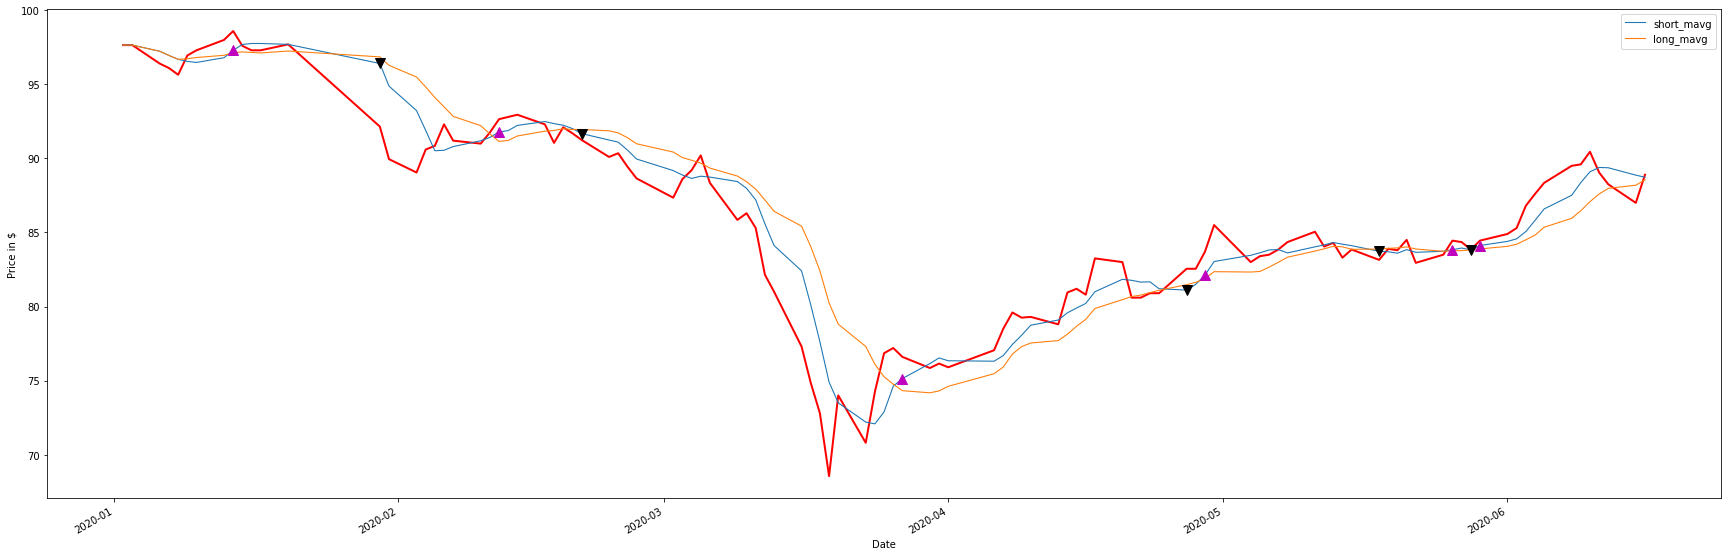

In [0]:
# Initialize the plot figure
fig = plt.figure(figsize=(30, 10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
stock['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=1.1)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

In [0]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 1000 shares
positions['0050.TW'] = 1000*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(stock['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(stock['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(stock['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

報酬率： 1.60 %


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32317 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21488 missing from current font.
  font.set_

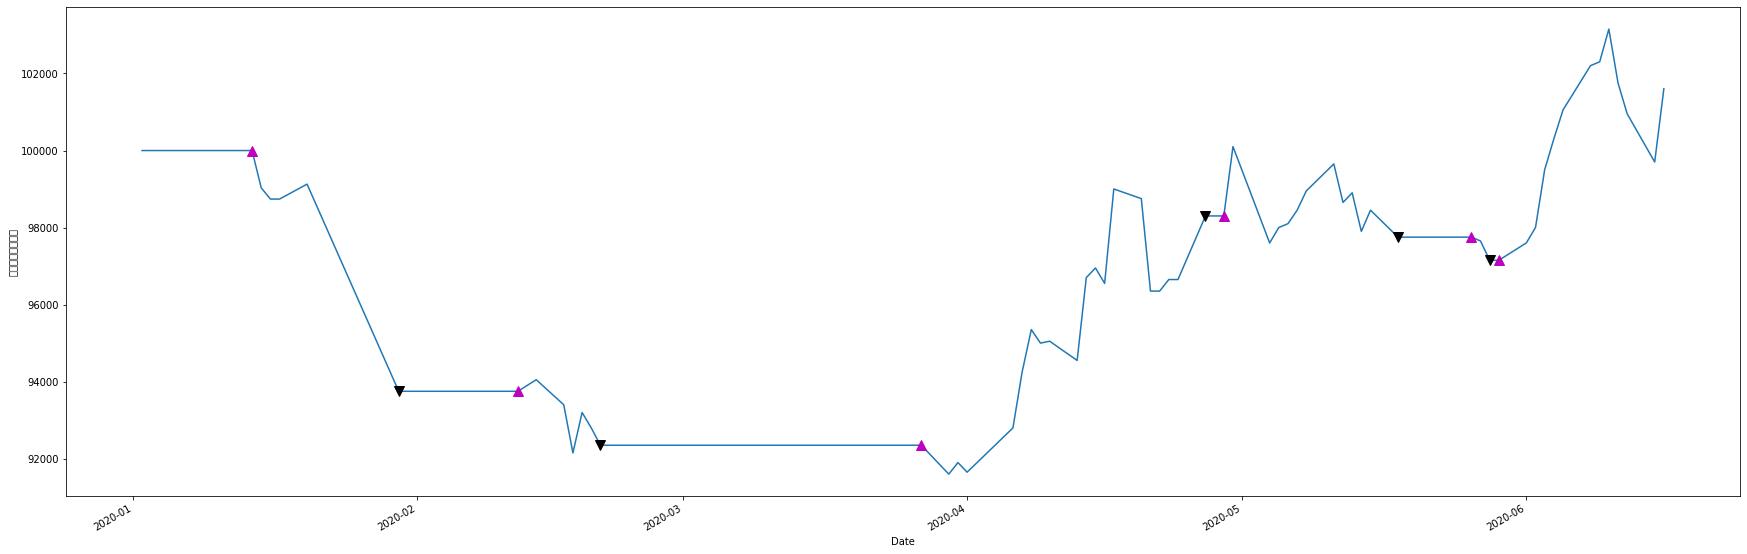

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 10))

ax1 = fig.add_subplot(111, ylabel='資產總值（台幣）')

# Plot the equity curve in twd
portfolio['total'].plot(ax=ax1, lw=1.5)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

print("報酬率：","{:.2f}".format(((portfolio.total[-1]/initial_capital)-1)*100),"%")

# Show the plot
plt.show()